In [1]:
import os
# Set working directory
os.chdir("D:/ACP")  # Windows path fix: use forward slash or raw string

print("Current Working Directory:", os.getcwd())

Current Working Directory: D:\ACP


In [2]:
import pandas as pd
import joblib
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
)
import matplotlib.pyplot as plt

In [3]:
# Step 1: Load the datasets (datasets were already splited and saved as csv files, 80,20 split)
train_data = pd.read_csv("acp_train_bert_features.csv") #train data
test_data = pd.read_csv("acp_test_bert_features.csv") #test data
# Step 2: Separate labels and features
y_train, X_train = train_data.iloc[:, 2], train_data.iloc[:, 3:] # third column: Label, # from fourth column onward: features
y_test, X_test = test_data.iloc[:, 2], test_data.iloc[:, 3:]

In [4]:
# Define the SVM model and hyperparameter grid
svm_model = SVC(probability=True, random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 50, 100],               # Regularization parameter, default is 1.0, Range is 0.1 to 100
    'kernel': ['rbf','poly'],   # Kernel type: linear, radial basis function (rbf), polynomial, default is rbf
    'gamma': ['scale'],            # Kernel coefficient for rbf, poly, and sigmoid kernels, default is scale
    'degree': [3, 4, 5],                   # Degree of the polynomial kernel (only relevant if kernel='poly'), default is 3, Range is 1-5
    'max_iter': [100, 200, 300, 400, 500],        # Maximum number of iterations, default is -1, Range is 100 to 1000000
}
# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=1,
    verbose=2,
)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
# Step 6: Use the best model from GridSearchCV
best_svm_model = grid_search.best_estimator_

# Save best hyperparameters to a file
with open('best_model_info_svm_protbert.txt', 'w') as f:
    f.write("Best Hyperparameters:\n")
    for param, value in grid_search.best_params_.items():
        f.write(f"{param}: {value}\n")

print("Best model information has been saved to 'best_model_info_svm_protbert.txt'")

#save the model
joblib.dump(best_svm_model, "best_svm_protbert_model.pkl")

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   1.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   1.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.9s
[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   1.2s
[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   1.2s
[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   1.3s
[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   1.2s
[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   1.1s
[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   1.1s
[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   1.2s
[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   1.1s
[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   1.2s
[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   1.2s
[CV] END C=0.1, degree=3, gamma=scale, kernel=rbf, max_iter=500; total time=

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s
[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s
[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s
[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.3s
[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s
[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s
[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.3s
[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.3s
[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.3s
[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.3s
[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s
[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s
[CV] END C=0.1, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   1.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   1.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   1.0s
[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   1.4s
[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   1.3s
[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   1.2s
[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   1.2s
[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   1.2s
[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   1.2s
[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   1.1s
[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   1.2s
[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   1.2s
[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   1.2s
[CV] END C=0.1, degree=4, gamma=scale, kernel=rbf, max_iter=500; total time=

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s
[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s
[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.3s
[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s
[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s
[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s
[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s
[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.3s
[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.3s
[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.3s
[CV] END C=0.1, degree=4, gamma=scale, kernel=poly, max_iter=500;

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   1.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.9s
[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   1.1s
[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   1.1s
[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   1.1s
[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   1.1s
[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   1.2s
[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   1.1s
[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   1.2s
[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   1.1s
[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   1.1s
[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   1.1s
[CV] END C=0.1, degree=5, gamma=scale, kernel=rbf, max_iter=500; total time=

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s
[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s
[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s
[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s
[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.3s
[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s
[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s
[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s
[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.3s
[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.3s
[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.3s
[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=0.1, degree=5, gamma=scale, kernel=poly, max_iter=500;

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.9s
[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.9s
[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.9s
[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.9s
[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.9s
[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.9s
[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.9s
[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.9s
[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.9s
[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.9s
[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=500; total time=   0.9s
[CV] END C=1, degree=3, gamma=scale, kernel=rbf, max_iter=500; total time=   1.0s
[CV] END C=1, de

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s
[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s
[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s
[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s
[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s
[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s
[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s
[CV] END C=1, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   1.0s
[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   0.9s
[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   1.0s
[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   0.9s
[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   1.0s
[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   0.9s
[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   1.0s
[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   1.0s
[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   1.0s
[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   1.1s
[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=500; total time=   0.9s
[CV] END C=1, degree=4, gamma=scale, kernel=rbf, max_iter=500; total time=   1.0s
[CV] END C=1, de

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s
[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s
[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s
[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s
[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s
[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s
[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s
[CV] END C=1, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   1.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   1.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   1.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.9s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   1.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   1.0s
[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   1.0s
[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   1.0s
[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   1.0s
[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   1.0s
[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   1.0s
[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   1.1s
[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   1.0s
[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   1.0s
[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   0.9s
[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=500; total time=   1.0s
[CV] END C=1, degree=5, gamma=scale, kernel=rbf, max_iter=500; total time=   0.9s
[CV] END C=1, de

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s
[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s
[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s
[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s
[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s
[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s
[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s
[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s
[CV] END C=1, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=500; total time=   0.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=500; total time=   0.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s
[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s
[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s
[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=500; total time=   0.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s
[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s
[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s
[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s
[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s
[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   0.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   0.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   0.8s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s
[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s
[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s
[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s
[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=10, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s
[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.1s
[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s
[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s
[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s
[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s
[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s
[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s
[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s
[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s
[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s
[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s
[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s
[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s
[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s
[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s
[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.0s
[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s
[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s
[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.4s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s
[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s
[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s
[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s
[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s
[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s
[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s
[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s
[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=50, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=300; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s
[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s
[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s
[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s
[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s
[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s
[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s
[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s
[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s
[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=3, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s
[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s
[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s
[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s
[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s
[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s
[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s
[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s
[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=4, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=100; total time=   0.3s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=200; total time=   0.5s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=300; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=400; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=500; total time=   0.7s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=rbf, max_iter=500; total time=   0.6s
[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s
[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s
[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=100; total time=   0.0s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s
[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s
[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=200; total time=   0.1s
[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s
[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=300; total time=   0.1s
[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s
[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=400; total time=   0.1s
[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.2s


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END C=100, degree=5, gamma=scale, kernel=poly, max_iter=500; total time=   0.1s
Best Hyperparameters: {'C': 50, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 500}
Best model information has been saved to 'best_model_info_svm_protbert.txt'


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


['best_svm_protbert_model.pkl']

In [5]:
# Step 8: Fit the model on the training data
best_svm_model.fit(X_train, y_train)

# Evaluate on the test dataset
y_test_pred = best_svm_model.predict(X_test)
y_test_prob = best_svm_model.predict_proba(X_test)[:, 1]

# Calculate and print accuracy, classification reports, and confusion matrices
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"svm Test Accuracy: {test_accuracy * 100:.2f}%")

# Confusion Matrices
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Data):\n", confusion_matrix_test)

# Sensitivity and Specificity calculation
def calculate_sensitivity_specificity(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

sensitivity_test, specificity_test = calculate_sensitivity_specificity(confusion_matrix_test)
print("Test Data - Sensitivity:", sensitivity_test, "Specificity:", specificity_test)

svm Test Accuracy: 77.84%
Confusion Matrix (Test Data):
 [[67 24]
 [17 77]]
Test Data - Sensitivity: 0.8191489361702128 Specificity: 0.7362637362637363


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [6]:
print("Confusion Matrix (Test Data):")
print(f"TN: {confusion_matrix_test[0,0]}  FP: {confusion_matrix_test[0,1]}")
print(f"FN: {confusion_matrix_test[1,0]}  TP: {confusion_matrix_test[1,1]}")

Confusion Matrix (Test Data):
TN: 67  FP: 24
FN: 17  TP: 77


In [7]:
from sklearn.metrics import f1_score
# calculation of F1 score
f1_test = f1_score(y_test, y_test_pred)
print("F1 Score (Test Data):", f1_test)

F1 Score (Test Data): 0.7897435897435897


In [8]:
#calculation of classification report for test and evaluation data
print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.80      0.74      0.77        91
           1       0.76      0.82      0.79        94

    accuracy                           0.78       185
   macro avg       0.78      0.78      0.78       185
weighted avg       0.78      0.78      0.78       185



In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
# Compute metrics
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
mcc = matthews_corrcoef(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient (MCC):", mcc)

Precision: 0.7623762376237624
Recall: 0.8191489361702128
F1 Score: 0.7897435897435897
Matthews Correlation Coefficient (MCC): 0.5576992719442267


Test Data ROC AUC: 0.8541033434650455
Test Data FPR: [0.         0.         0.         0.01098901 0.01098901 0.03296703
 0.03296703 0.04395604 0.04395604 0.06593407 0.06593407 0.07692308
 0.07692308 0.0989011  0.0989011  0.10989011 0.10989011 0.12087912
 0.12087912 0.13186813 0.13186813 0.14285714 0.14285714 0.16483516
 0.16483516 0.20879121 0.20879121 0.21978022 0.21978022 0.25274725
 0.25274725 0.26373626 0.26373626 0.2967033  0.2967033  0.32967033
 0.32967033 0.37362637 0.37362637 0.40659341 0.40659341 0.46153846
 0.46153846 0.50549451 0.50549451 0.51648352 0.51648352 0.52747253
 0.52747253 0.54945055 0.54945055 0.58241758 0.58241758 0.61538462
 0.61538462 0.64835165 0.64835165 0.72527473 0.72527473 1.        ]
Test Data TPR: [0.         0.0106383  0.11702128 0.11702128 0.12765957 0.12765957
 0.26595745 0.26595745 0.41489362 0.41489362 0.5106383  0.5106383
 0.53191489 0.53191489 0.55319149 0.55319149 0.62765957 0.62765957
 0.63829787 0.63829787 0.68085106 0.68085106 0.72340426 0.723

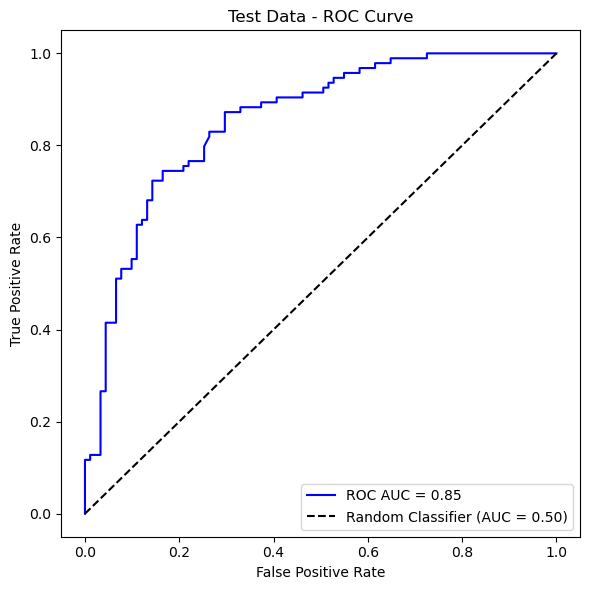

In [10]:
# Evaluate on the test dataset
y_test_pred = best_svm_model.predict(X_test)
y_test_prob = best_svm_model.predict_proba(X_test)[:, 1]

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate ROC for test dataset
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Print the values
print("Test Data ROC AUC:", roc_auc_test)
print("Test Data FPR:", fpr_test)
print("Test Data TPR:", tpr_test)
print("Test Data Thresholds:", thresholds_test)

# Create a plot
fig, ax = plt.subplots(figsize=(6, 6))  # This defines 'ax' properly

# Plot ROC curve
ax.plot(fpr_test, tpr_test, label=f"ROC AUC = {roc_auc_test:.2f}", color="blue")
ax.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.50)")
ax.set_title("Test Data - ROC Curve")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="lower right")

# Adjust layout and save figure
plt.tight_layout()
plt.savefig("svm_protbert_roc_auc_curve_protbert.png", dpi=500)
print("ROC curve saved as 'svm_protbert_roc_auc_curve.png'.")

# Show the plot
plt.show()

In [11]:
# Perform 10-fold cross-validation on the best model
cross_val_scores = cross_val_score(best_svm_model, X_train, y_train, cv=10, scoring='accuracy')
print("10-Fold Cross-Validation Accuracy Scores:", cross_val_scores)
print("Mean 10-Fold CV Accuracy:", cross_val_scores.mean())

# save accuracy of each fold to a text file
with open('cv_accuracies_svm_protbert.txt', 'w') as f:
    f.write("Cross-Validation Accuracies for each fold:\n")
    for i, score in enumerate(cross_val_scores):
        f.write(f"Fold {i+1} Accuracy: {score:.4f}\n")

print("Accuracy of each fold has been saved to 'cv_accuracies_svm_protbert.txt'")

C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated e

10-Fold Cross-Validation Accuracy Scores: [0.72972973 0.82432432 0.77027027 0.72972973 0.7972973  0.78378378
 0.86486486 0.82432432 0.78082192 0.90410959]
Mean 10-Fold CV Accuracy: 0.800925583117364
Accuracy of each fold has been saved to 'cv_accuracies_svm_protbert.txt'


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Mean Accuracy: 80.09
Mean AUC: 0.9664


C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\myousaf23\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated e

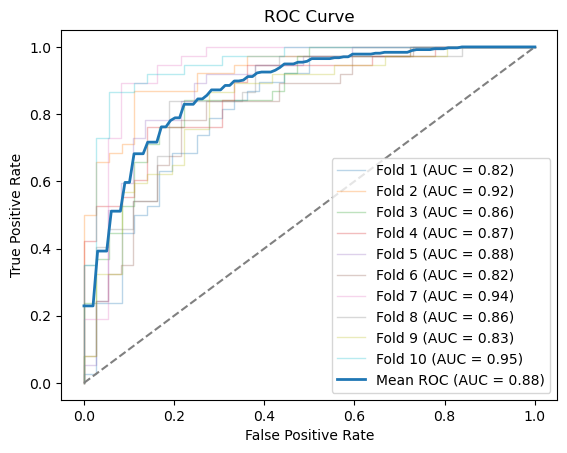

In [12]:
# make roc curve of all folds with mean auc and mean accuracy printed on the plot
mean_accuracy = cross_val_scores.mean() * 100
print(f"Mean Accuracy: {mean_accuracy:.2f}")
# Step 6: Generate ROC Curve
mean_auc = roc_auc_score(y_train, best_svm_model.predict_proba(X_train)[:, 1])
print(f"Mean AUC: {mean_auc:.4f}")

cv = StratifiedKFold(n_splits=10)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
for i, (train_idx, test_idx) in enumerate(cv.split(X_train, y_train)):
    best_svm_model.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    y_prob = best_svm_model.predict_proba(X_train.iloc[test_idx])[:, 1]
    fpr, tpr, _ = roc_curve(y_train.iloc[test_idx], y_prob)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig("cv_roc_curve_svm_protbert.png", dpi=500)
plt.show()